<a href="https://colab.research.google.com/github/Jdasanja/masters_thesis_final/blob/main/EDA_4_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas for reading and displaying local file
import pandas as pd

In [ ]:
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)


# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())


First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


In [ ]:
# Create a new dataframe with a new binary column based on the values in 'num'
df_binary_col = df.copy()
df_binary_col['num_binary'] = df_binary_col['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

df_binary_col = df_binary_col.drop('num', axis=1)


In [ ]:

## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:

import numpy as np

## Replace question marks with NaN
df_binary_col.replace('?', np.nan, inplace=True)

## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
## Drop rows with NaN values
df_binary_col.dropna(inplace=True)

## Verify if any null values remain
df_binary_col.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Splitting into Training and Testing Sets**

Splitting data into training and testing sets is crucial for building reliable machine learning models. The training set is used to teach the model by allowing it to learn patterns from the data, while the testing set evaluates the model’s performance on unseen data. This helps ensure that the model generalizes well and performs accurately on new, real-world data, reducing the risk of overfitting, where the model may perform well on training data but poorly on new data.

The dataset was split using the Sklearn library in python:<br>
sklearn, or scikit-learn, is an open-source Python library; it offers tools for data preprocessing, model training, and evaluation, with built-in algorithms for tasks like classification and regression

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

In [ ]:

# Explore the training set
print("DataFrame.info():")
X_train.info()

print("\nDataFrame.describe():")
print(X_train.describe())


DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 56 to 269
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       237 non-null    float64
 1   sex       237 non-null    float64
 2   cp        237 non-null    float64
 3   trestbps  237 non-null    float64
 4   chol      237 non-null    float64
 5   fbs       237 non-null    float64
 6   restecg   237 non-null    float64
 7   thalach   237 non-null    float64
 8   exang     237 non-null    float64
 9   oldpeak   237 non-null    float64
 10  slope     237 non-null    float64
 11  ca        237 non-null    object 
 12  thal      237 non-null    object 
dtypes: float64(11), object(2)
memory usage: 25.9+ KB

DataFrame.describe():
              age         sex          cp    trestbps        chol         fbs  \
count  237.000000  237.000000  237.000000  237.000000  237.000000  237.000000   
mean    54.772152    0.675105    3.185654  132.270042  24

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
patient_id,,,,,,,,,,,,,
56,54.0,1.0,4.0,124.0,266.0,0.0,2.0,109.0,1.0,2.2,2.0,1.0,7.0
161,46.0,1.0,2.0,101.0,197.0,1.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0
179,43.0,1.0,3.0,130.0,315.0,0.0,0.0,162.0,0.0,1.9,1.0,1.0,3.0
87,47.0,1.0,3.0,138.0,257.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0
80,58.0,1.0,4.0,150.0,270.0,0.0,2.0,111.0,1.0,0.8,1.0,0.0,7.0


In [ ]:

## Basic Descriptive
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,237.000,54.772,9.032,34.000,48.000,56.000,62.000,77.000
sex,237.000,0.675,0.469,0.000,0.000,1.000,1.000,1.000
cp,237.000,3.186,0.956,1.000,3.000,3.000,4.000,4.000
trestbps,237.000,132.270,17.916,94.000,120.000,130.000,140.000,200.000
chol,237.000,249.409,53.162,126.000,212.000,243.000,277.000,564.000
fbs,237.000,0.169,0.375,0.000,0.000,0.000,0.000,1.000
restecg,237.000,0.983,0.996,0.000,0.000,0.000,2.000,2.000
thalach,237.000,149.844,22.398,88.000,136.000,152.000,166.000,195.000
exang,237.000,0.346,0.477,0.000,0.000,0.000,1.000,1.000
oldpeak,237.000,1.062,1.180,0.000,0.000,0.800,1.800,6.200


In [ ]:
X_train.shape

(237, 13)

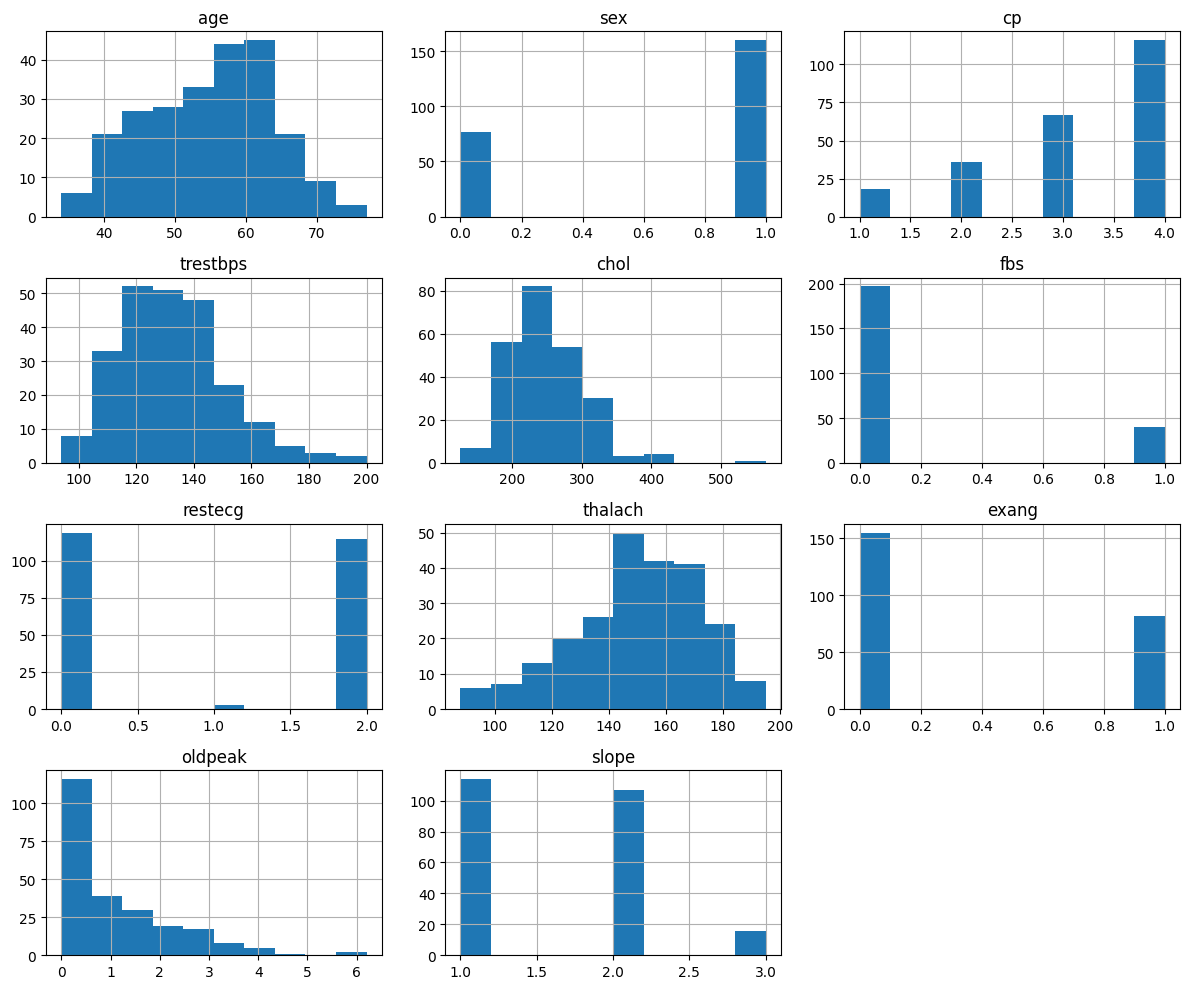

In [ ]:
import matplotlib.pyplot as plt

#Histogram
X_train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

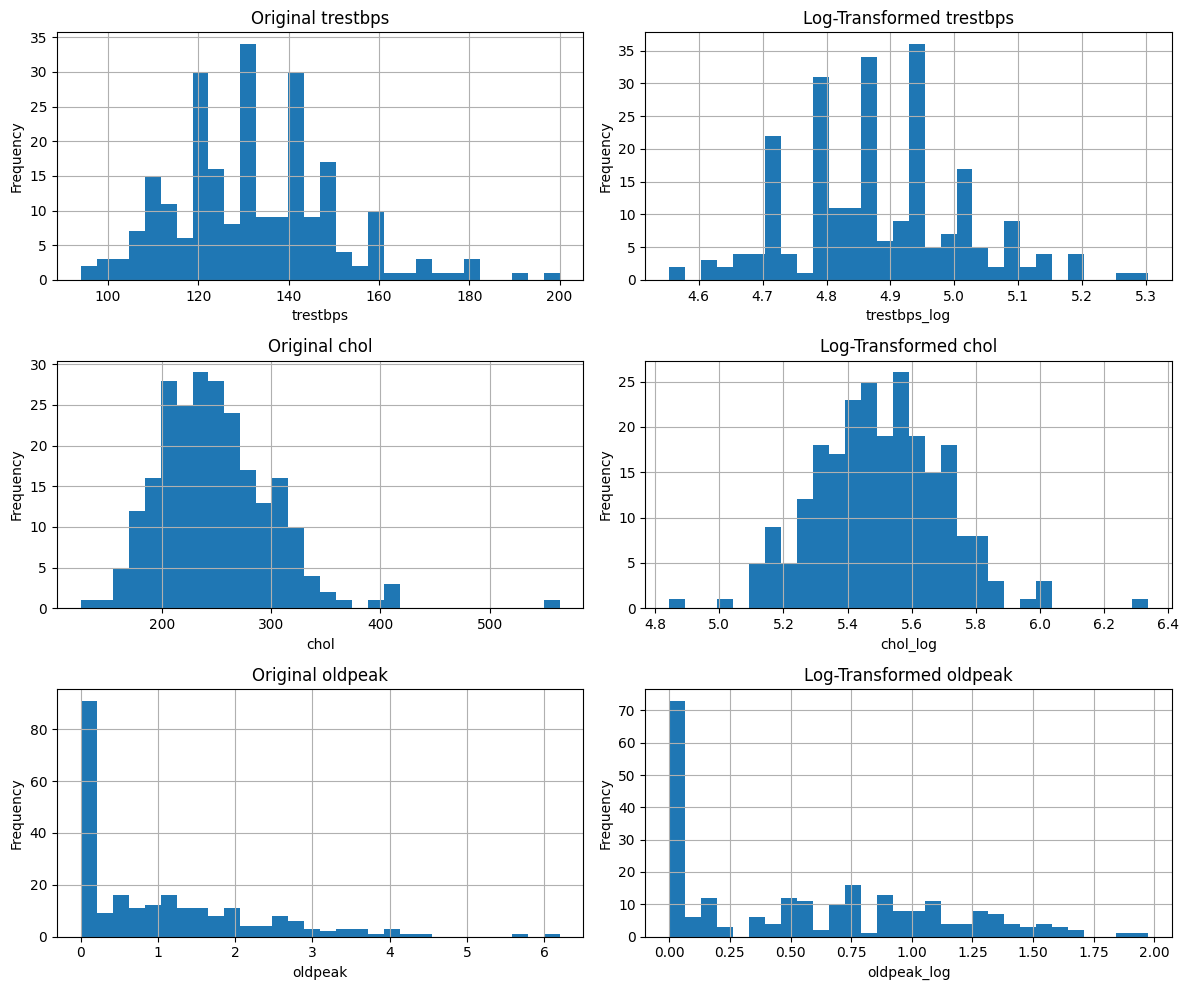

              age   sex    cp  trestbps    chol   fbs  restecg  thalach  \
patient_id                                                                
56         54.000 1.000 4.000   124.000 266.000 0.000    2.000  109.000   
161        46.000 1.000 2.000   101.000 197.000 1.000    0.000  156.000   
179        43.000 1.000 3.000   130.000 315.000 0.000    0.000  162.000   
87         47.000 1.000 3.000   138.000 257.000 0.000    2.000  156.000   
80         58.000 1.000 4.000   150.000 270.000 0.000    2.000  111.000   

            exang  oldpeak  slope   ca thal  trestbps_log  chol_log  \
patient_id                                                            
56          1.000    2.200  2.000  1.0  7.0         4.828     5.587   
161         0.000    0.000  1.000  0.0  7.0         4.625     5.288   
179         0.000    1.900  1.000  1.0  3.0         4.875     5.756   
87          0.000    0.000  1.000  0.0  3.0         4.934     5.553   
80          1.000    0.800  1.000  0.0  7.0     

In [ ]:
import numpy as np


df_explore = X_train.copy()
# Assuming `df` is the DataFrame with the original data

# Continuous Variables: Apply log transformation
df_explore['trestbps_log'] = np.log(df_explore['trestbps'] + 1)
df_explore['chol_log'] = np.log(df_explore['chol'] + 1)
df_explore['oldpeak_log'] = np.log(df['oldpeak'] + 1)

# Set up a subplot grid for continuous variables
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns

# Continuous variables to compare
continuous_vars = ['trestbps', 'chol', 'oldpeak']

# Plot continuous variables
for i, var in enumerate(continuous_vars):
    # Original distribution
    df_explore[var].hist(ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'Original {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # Log-transformed distribution
    df_explore[f'{var}_log'].hist(ax=axes[i, 1], bins=30)
    axes[i, 1].set_title(f'Log-Transformed {var}')
    axes[i, 1].set_xlabel(f'{var}_log')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check the resulting DataFrame
print(df_explore.head())


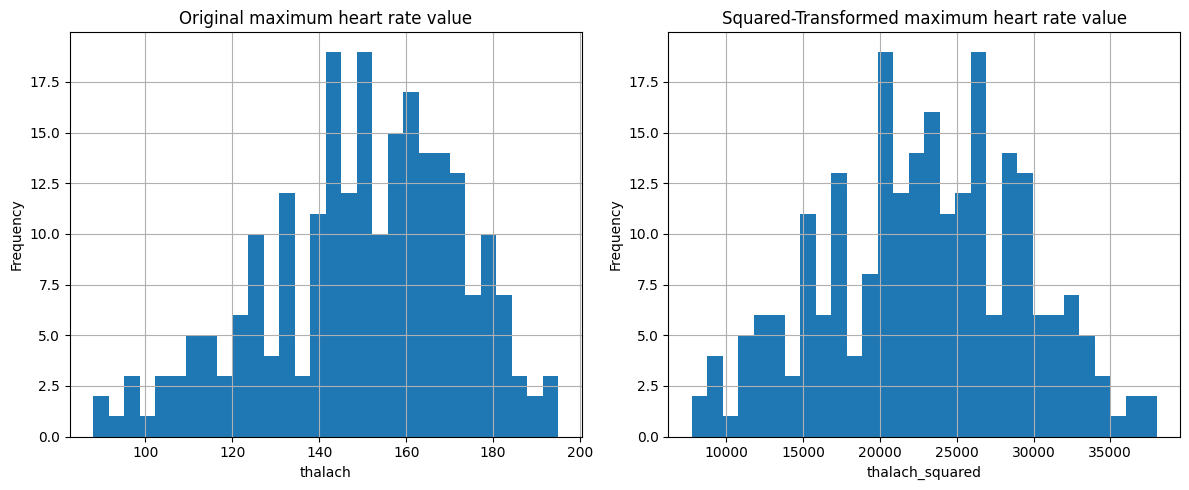

In [ ]:
# Calculate and add 'thalach_squared' column to the DataFrame
df_explore['thalach_squared'] = df_explore['thalach'] ** 2  # Squaring the 'thalach' column
# Set up a subplot grid with only two charts (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted the grid size and figure size for two plots

# Plotting the original distribution of 'chol' (cholesterol)
df_explore['thalach'].hist(ax=axes[0], bins=30)
axes[0].set_title('Original maximum heart rate value')
axes[0].set_xlabel('thalach')
axes[0].set_ylabel('Frequency')

# Plotting the log-transformed distribution of 'chol'
#df['thalach_log'] = np.log(df['thalach'] + 1)  # Apply log transformation to avoid log(0) issues
df_explore['thalach_squared'].hist(ax=axes[1], bins=30)
axes[1].set_title('Squared-Transformed maximum heart rate value')
axes[1].set_xlabel('thalach_squared')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

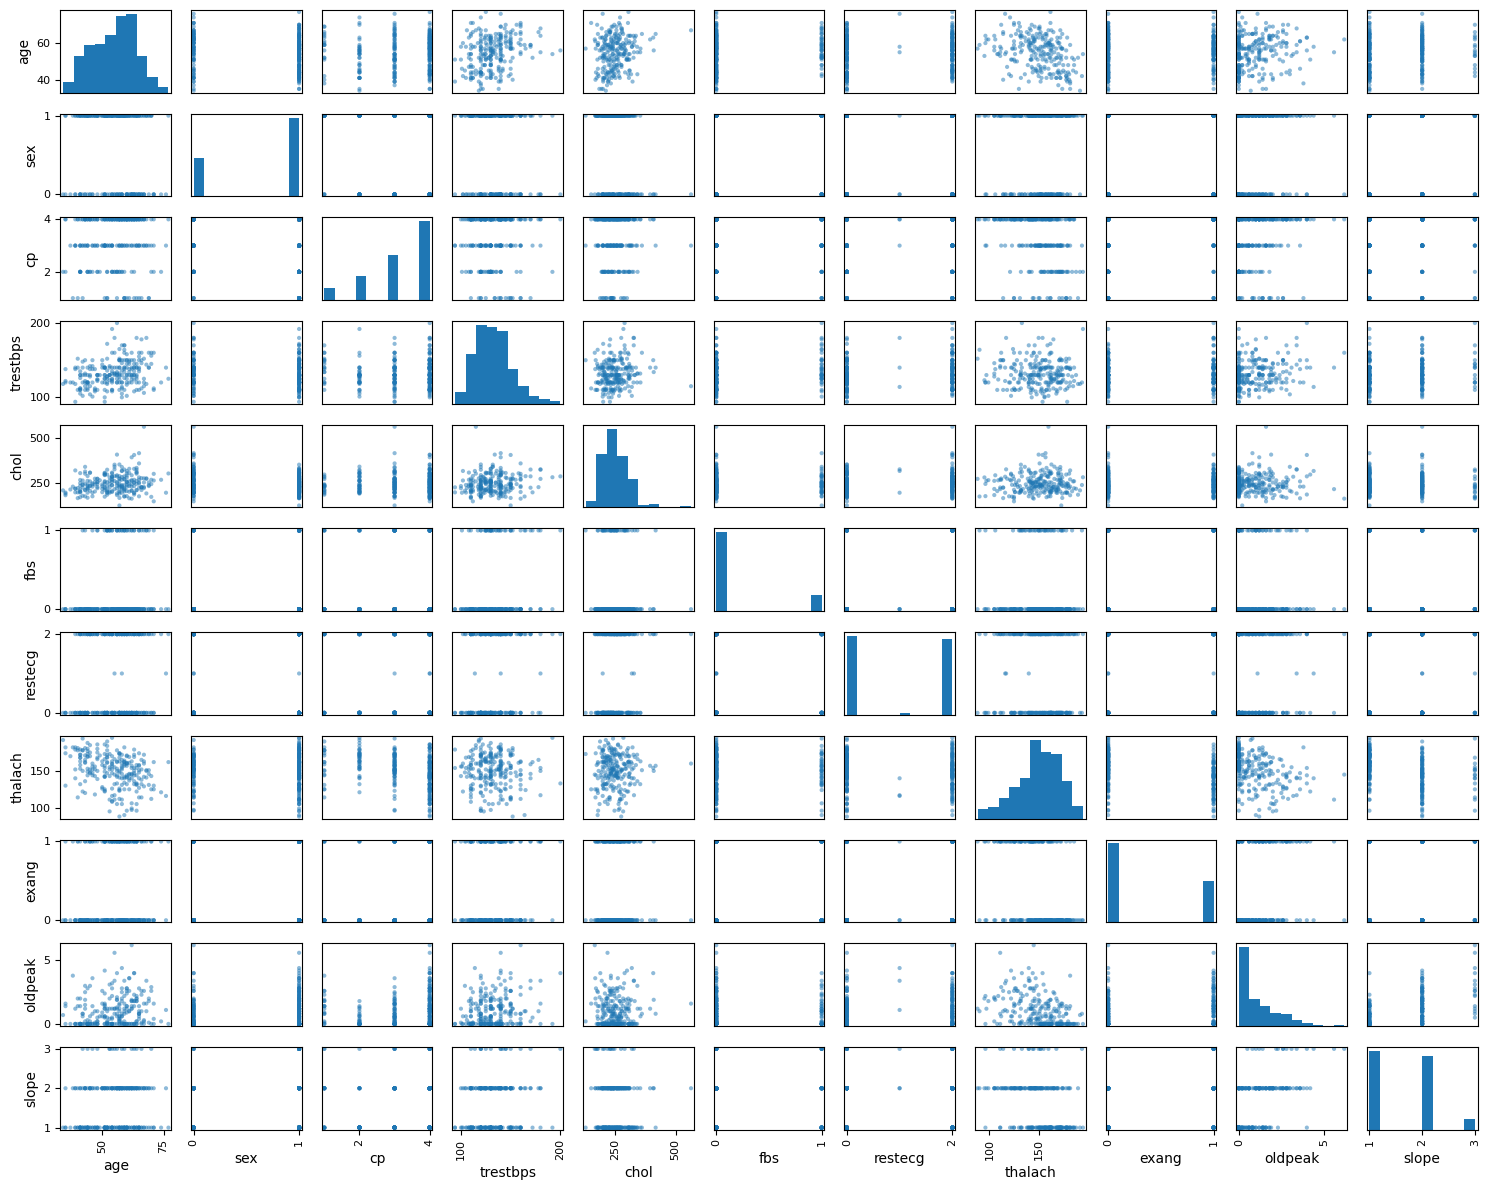

In [ ]:
from pandas.plotting import scatter_matrix


scatter_matrix(X_train, figsize=(15, 12))
plt.tight_layout()
plt.show()


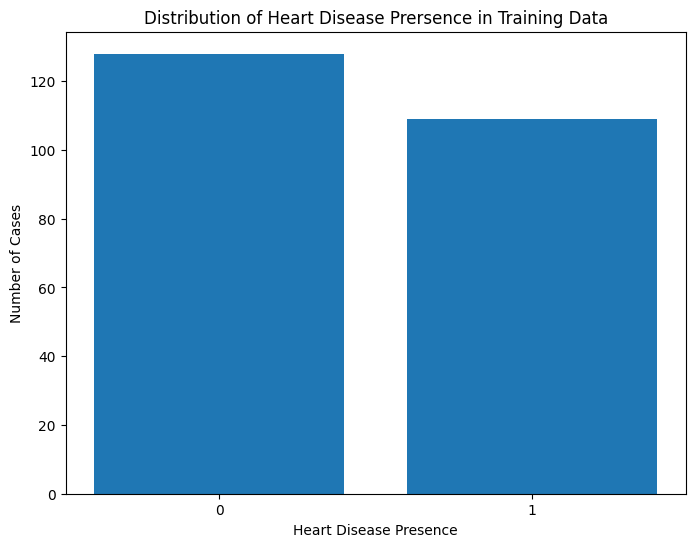

In [ ]:
# Merge X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Rename the target column (y_train) if necessary for clarity
train_data.rename(columns={'num_binary': 'HeartDiseasePresence'}, inplace=True)

# Count the occurrences of each severity level
severity_counts = train_data['HeartDiseasePresence'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(severity_counts.index, severity_counts.values, tick_label=severity_counts.index)
plt.xlabel("Heart Disease Presence")
plt.ylabel("Number of Cases")
plt.title("Distribution of Heart Disease Prersence in Training Data")
plt.xticks(severity_counts.index)  # Ensure proper labeling of severity levels
plt.show()

In [ ]:

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

# Group by Heart Disease Severity and calculate summary statistics
distribution_summary = train_data.groupby('HeartDiseasePresence').describe()

# Display the distribution summary
print(distribution_summary)

# Reset display options to default after viewing
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

                         age                                                  \
                       count   mean   std    min    25%    50%    75%    max   
HeartDiseasePresence                                                           
0                    128.000 53.117 9.671 34.000 44.750 52.500 60.250 76.000   
1                    109.000 56.716 7.825 35.000 53.000 58.000 62.000 77.000   

                         sex                                            \
                       count  mean   std   min   25%   50%   75%   max   
HeartDiseasePresence                                                     
0                    128.000 0.570 0.497 0.000 0.000 1.000 1.000 1.000   
1                    109.000 0.798 0.403 0.000 1.000 1.000 1.000 1.000   

                          cp                                            \
                       count  mean   std   min   25%   50%   75%   max   
HeartDiseasePresence                                                     
0     

In [ ]:

# from scipy.stats import chi2_contingency
# import seaborn as sns

# # List of columns to exclude
# exclude_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'oldpeak','chol']

# # Iterate only through columns not in exclude_columns
# for column in [col for col in X_train.columns if col not in exclude_columns]:
#     plt.figure(figsize=(8, 5))

#     # Perform Chi-Square test
#     contingency_table = pd.crosstab(train_data[column], train_data['HeartDiseasePresence'])
#     chi2, p, dof, expected = chi2_contingency(contingency_table)

#     # Visualize the distribution using a swarm plot
#     sns.swarmplot(data=train_data, x='HeartDiseasePresence', y=column, size=3)
#     plt.title(f'Swarm Plot of {column} by Heart Disease Presence')
#     plt.xlabel('Heart Disease Presence')
#     plt.ylabel(column)

#     # Add Chi-Square p-value to the plot
#     plt.figtext(0.15, 0.85, f'Chi-Square p-value: {p:.4e}', fontsize=10, color='red')

#     plt.show()

#     # Print the test results in the console for reference
#     print(f'Chi-Square Test for {column}:')
#     print(f'Chi2 Statistic: {chi2:.4f}, p-value: {p:.4e}')
#     print('-' * 40)

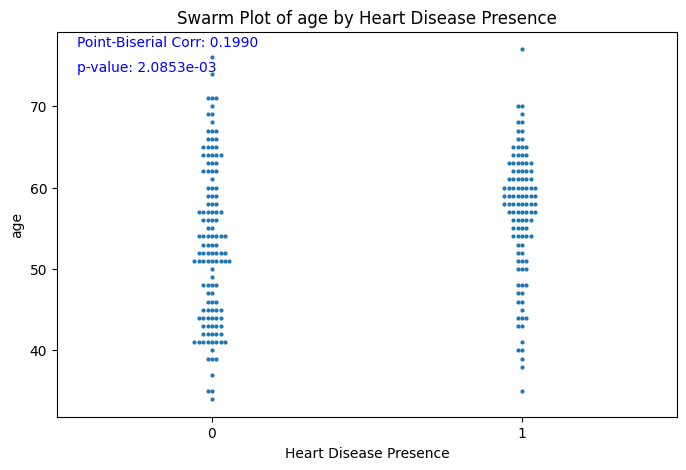

----------------------------------------
Point-Biserial Correlation for age:
Correlation Coefficient: 0.1990, p-value: 2.0853e-03


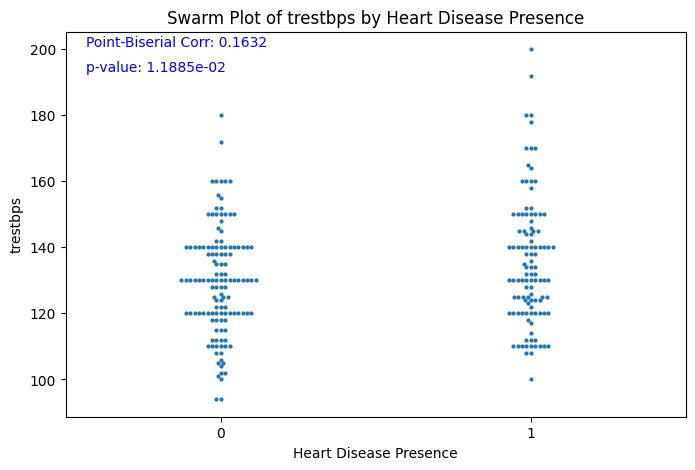

----------------------------------------
Point-Biserial Correlation for trestbps:
Correlation Coefficient: 0.1632, p-value: 1.1885e-02


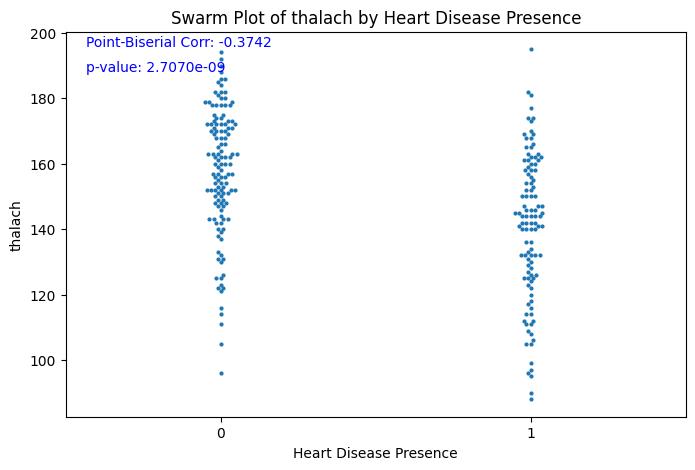

----------------------------------------
Point-Biserial Correlation for thalach:
Correlation Coefficient: -0.3742, p-value: 2.7070e-09


In [ ]:
from scipy.stats import chi2_contingency, pointbiserialr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to exclude
exclude_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'oldpeak', 'chol']

# Iterate only through columns not in exclude_columns
for column in [col for col in X_train.columns if col not in exclude_columns]:
    plt.figure(figsize=(8, 5))

    # Perform Chi-Square test (for later use)
    contingency_table = pd.crosstab(train_data[column], train_data['HeartDiseasePresence'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calculate Point-Biserial Correlation Coefficient
    biserial_corr, biserial_p = pointbiserialr(train_data[column], train_data['HeartDiseasePresence'])

    # Visualize the distribution using a swarm plot
    sns.swarmplot(data=train_data, x='HeartDiseasePresence', y=column, size=3)
    plt.title(f'Swarm Plot of {column} by Heart Disease Presence')
    plt.xlabel('Heart Disease Presence')
    plt.ylabel(column)

    # Add Point-Biserial correlation to the plot
    plt.figtext(0.15, 0.85, f'Point-Biserial Corr: {biserial_corr:.4f}', fontsize=10, color='blue')
    plt.figtext(0.15, 0.80, f'p-value: {biserial_p:.4e}', fontsize=10, color='blue')

    plt.show()

    # Print the test results in the console for reference
   # print(f'Chi-Square Test for {column}:')
   # print(f'Chi2 Statistic: {chi2:.4f}, p-value: {p:.4e}')
    print('-' * 40)
    print(f'Point-Biserial Correlation for {column}:')
    print(f'Correlation Coefficient: {biserial_corr:.4f}, p-value: {biserial_p:.4e}')
    print('=' * 40)


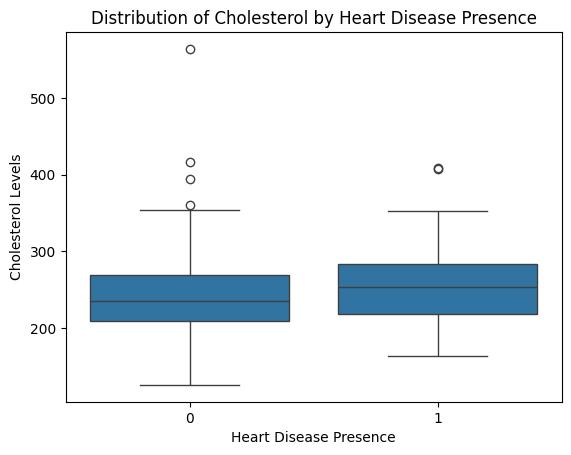

In [ ]:
sns.boxplot(data=train_data, x='HeartDiseasePresence', y='chol')
plt.title('Distribution of Cholesterol by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Cholesterol Levels')
plt.show()

In [ ]:
from scipy.stats import pointbiserialr
import pandas as pd

# Select the relevant columns for 'chol' and 'HeartDiseasePresence'
chol_values = train_data['chol']
heart_disease_presence = train_data['HeartDiseasePresence']

# Calculate Point-Biserial Correlation
biserial_corr, biserial_p = pointbiserialr(chol_values, heart_disease_presence)

# Display results
print("Point-Biserial Correlation Results:")
print(f"Correlation Coefficient: {biserial_corr:.4f}")
print(f"p-value: {biserial_p:.4e}")


Point-Biserial Correlation Results:
Correlation Coefficient: 0.0661
p-value: 3.1068e-01


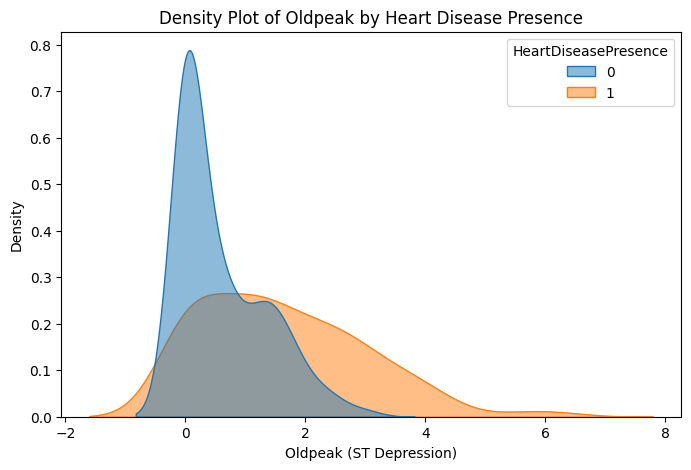

In [ ]:

plt.figure(figsize=(8, 5))
sns.kdeplot(data=train_data, x='oldpeak', hue='HeartDiseasePresence', fill=True, common_norm=False, alpha=0.5)
plt.title('Density Plot of Oldpeak by Heart Disease Presence')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Density')
plt.show()

In [ ]:

from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for 'chol' and 'HeartDiseaseSeverity'
contingency_table = pd.crosstab(train_data['oldpeak'], train_data['HeartDiseasePresence'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4e}")

Chi-Square Test Results:
Chi2 Statistic: 68.8562
p-value: 1.6005e-03


Chi-Square Test for sex:
Chi2 Statistic = 12.91475, p-value = 3.26e-04, Degrees of Freedom = 1
Significant association between sex and HeartDiseasePresence (p < 0.05).



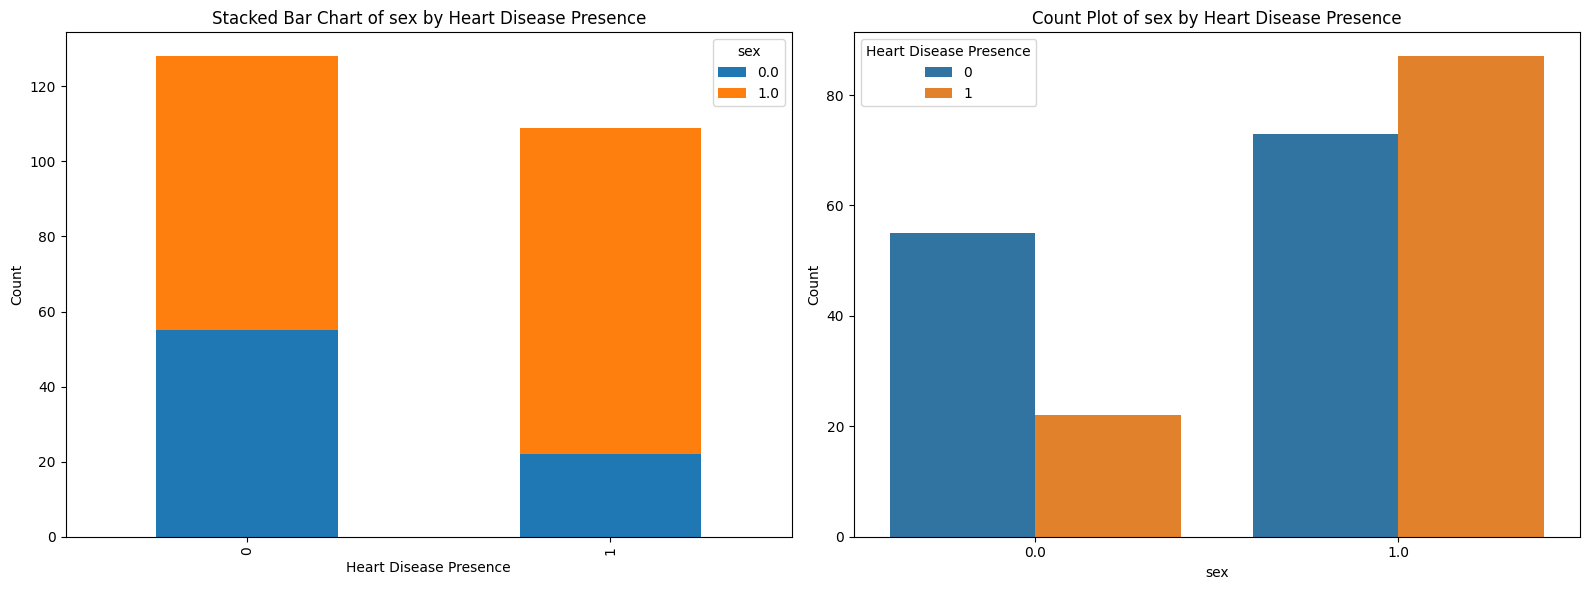

Chi-Square Test for cp:
Chi2 Statistic = 65.29635, p-value = 4.33e-14, Degrees of Freedom = 3
Significant association between cp and HeartDiseasePresence (p < 0.05).



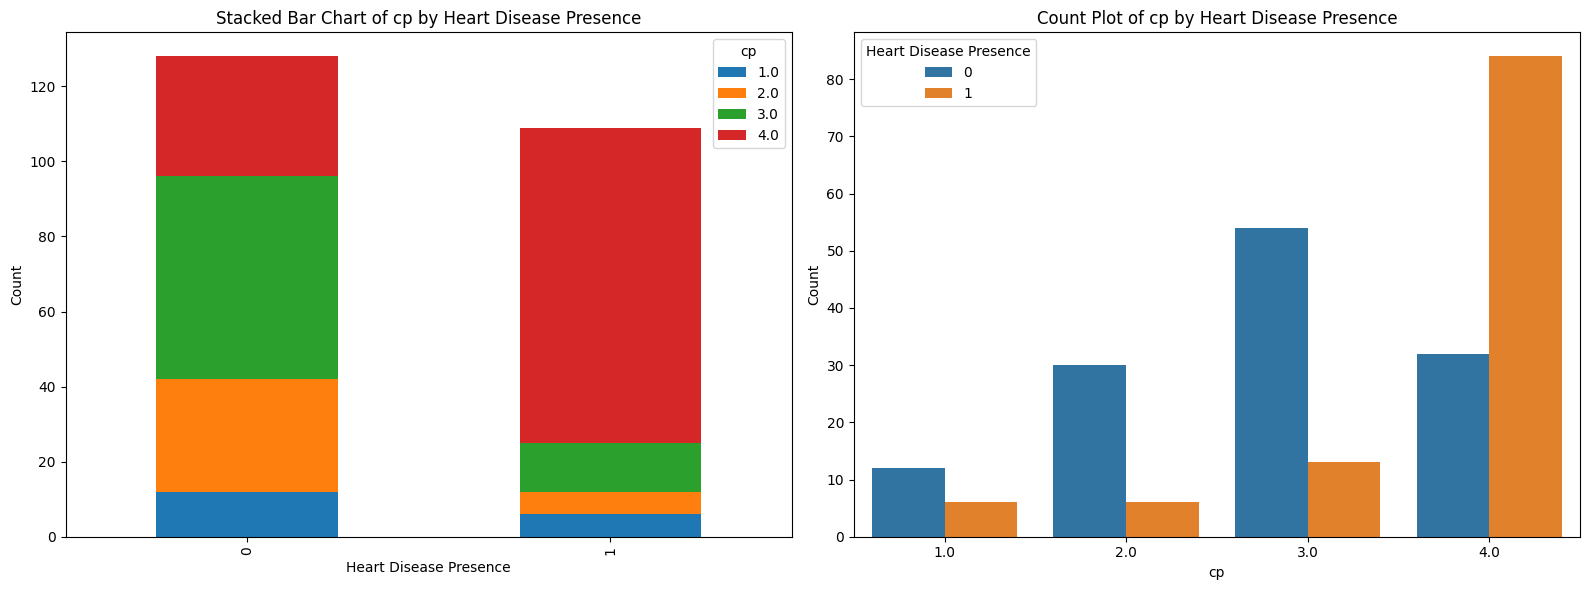

Chi-Square Test for fbs:
Chi2 Statistic = 0.00129, p-value = 9.71e-01, Degrees of Freedom = 1
No significant association between fbs and HeartDiseasePresence (p >= 0.05).



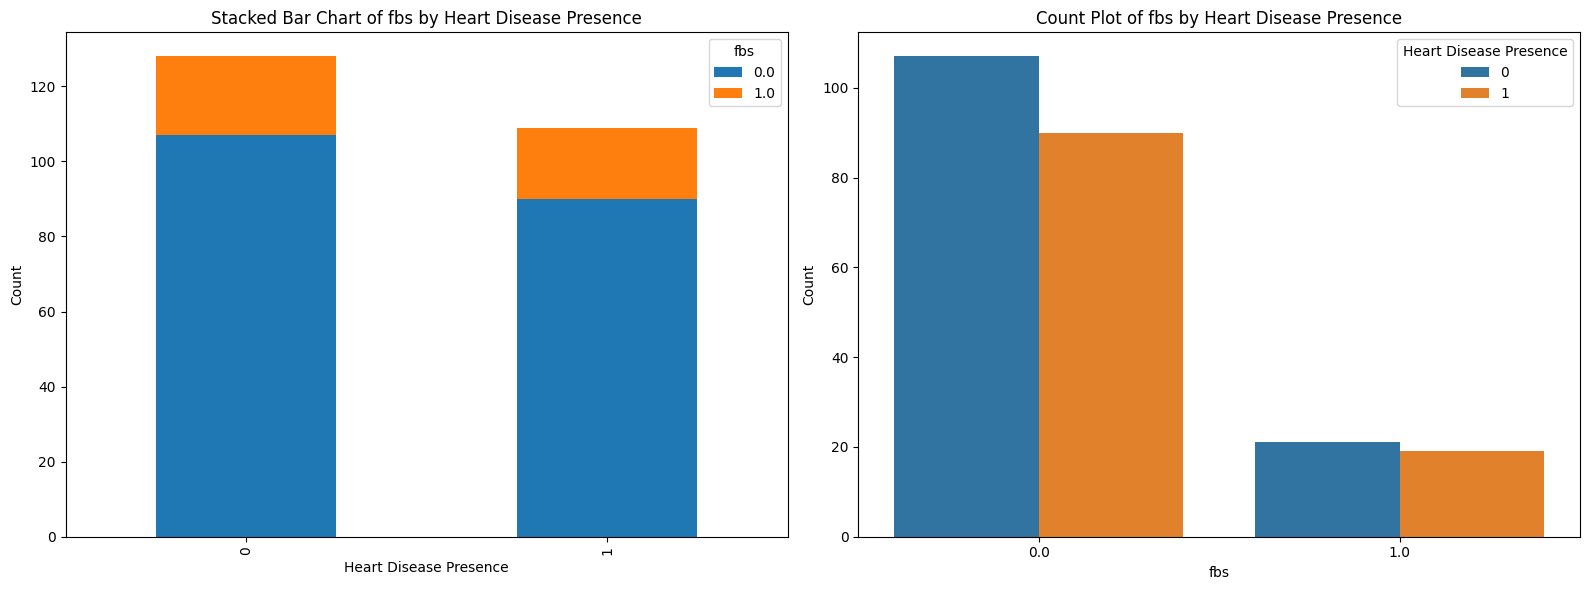

Chi-Square Test for restecg:
Chi2 Statistic = 7.98928, p-value = 1.84e-02, Degrees of Freedom = 2
Significant association between restecg and HeartDiseasePresence (p < 0.05).



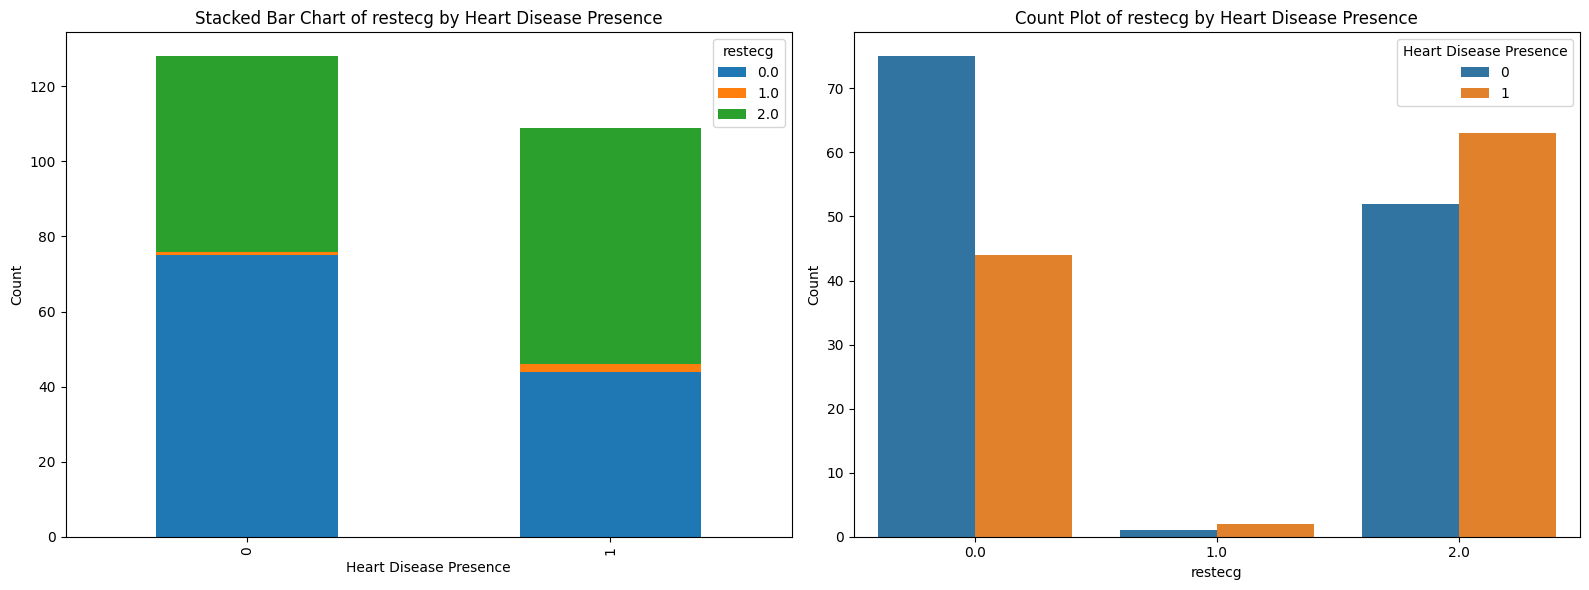

Chi-Square Test for exang:
Chi2 Statistic = 35.63319, p-value = 2.38e-09, Degrees of Freedom = 1
Significant association between exang and HeartDiseasePresence (p < 0.05).



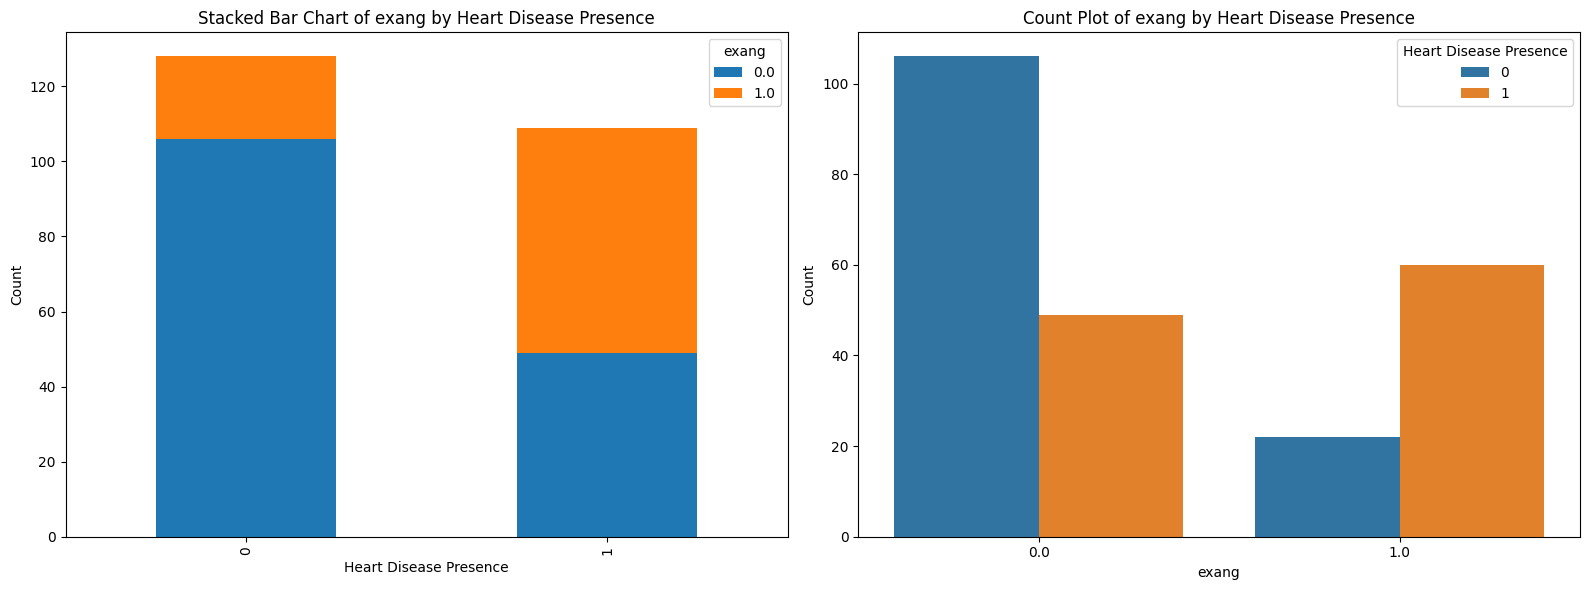

Chi-Square Test for slope:
Chi2 Statistic = 37.40353, p-value = 7.55e-09, Degrees of Freedom = 2
Significant association between slope and HeartDiseasePresence (p < 0.05).



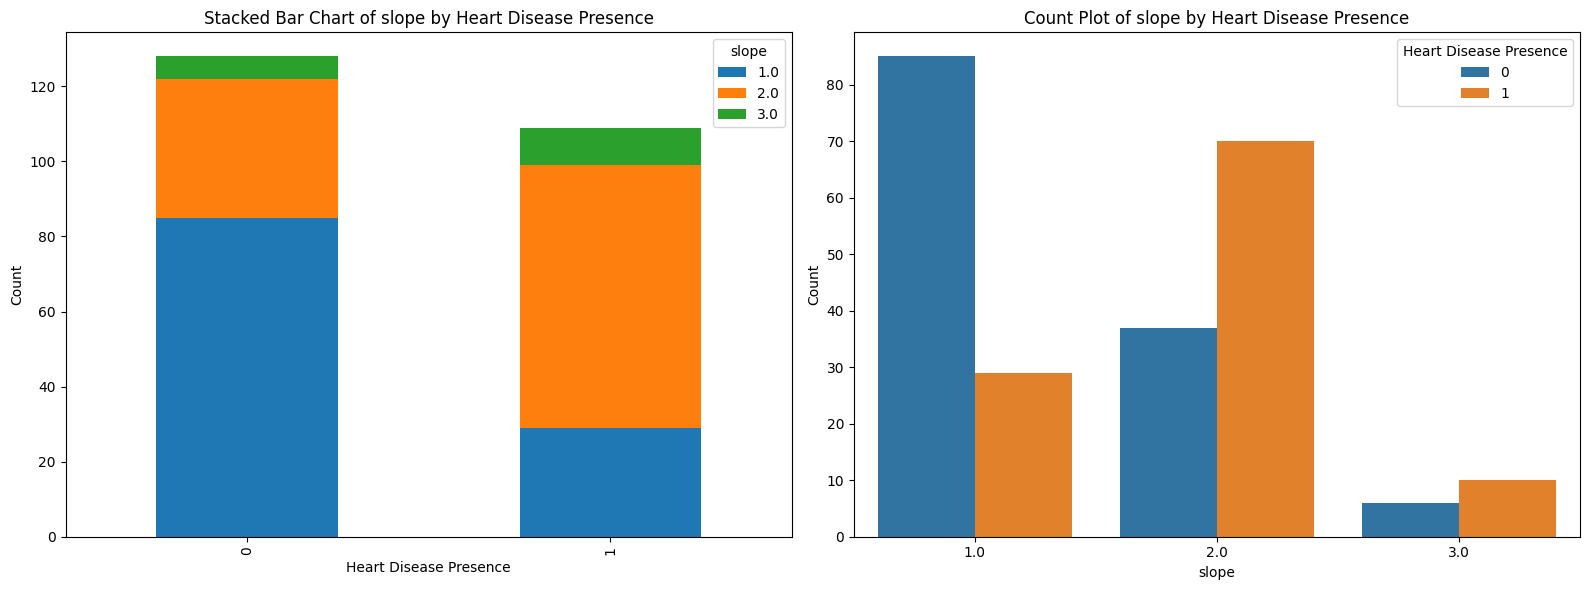

Chi-Square Test for ca:
Chi2 Statistic = 46.99451, p-value = 3.48e-10, Degrees of Freedom = 3
Significant association between ca and HeartDiseasePresence (p < 0.05).



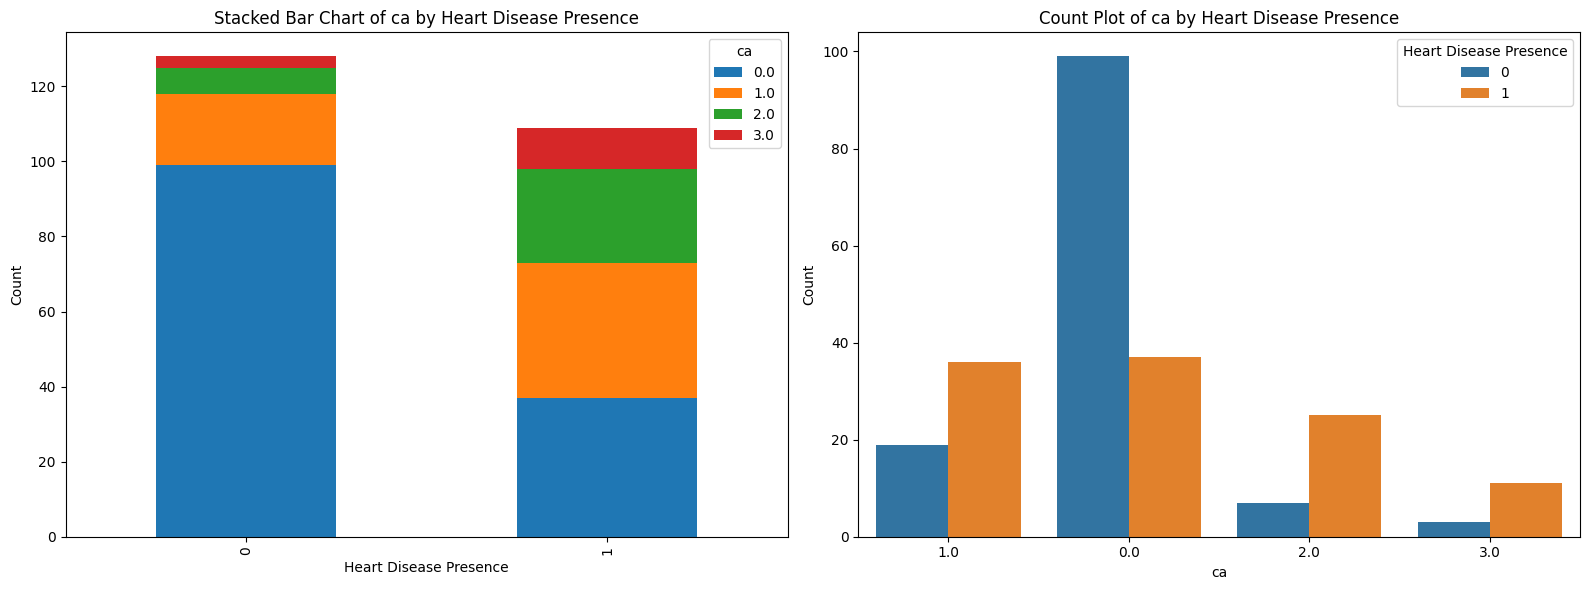

Chi-Square Test for thal:
Chi2 Statistic = 66.31957, p-value = 3.97e-15, Degrees of Freedom = 2
Significant association between thal and HeartDiseasePresence (p < 0.05).



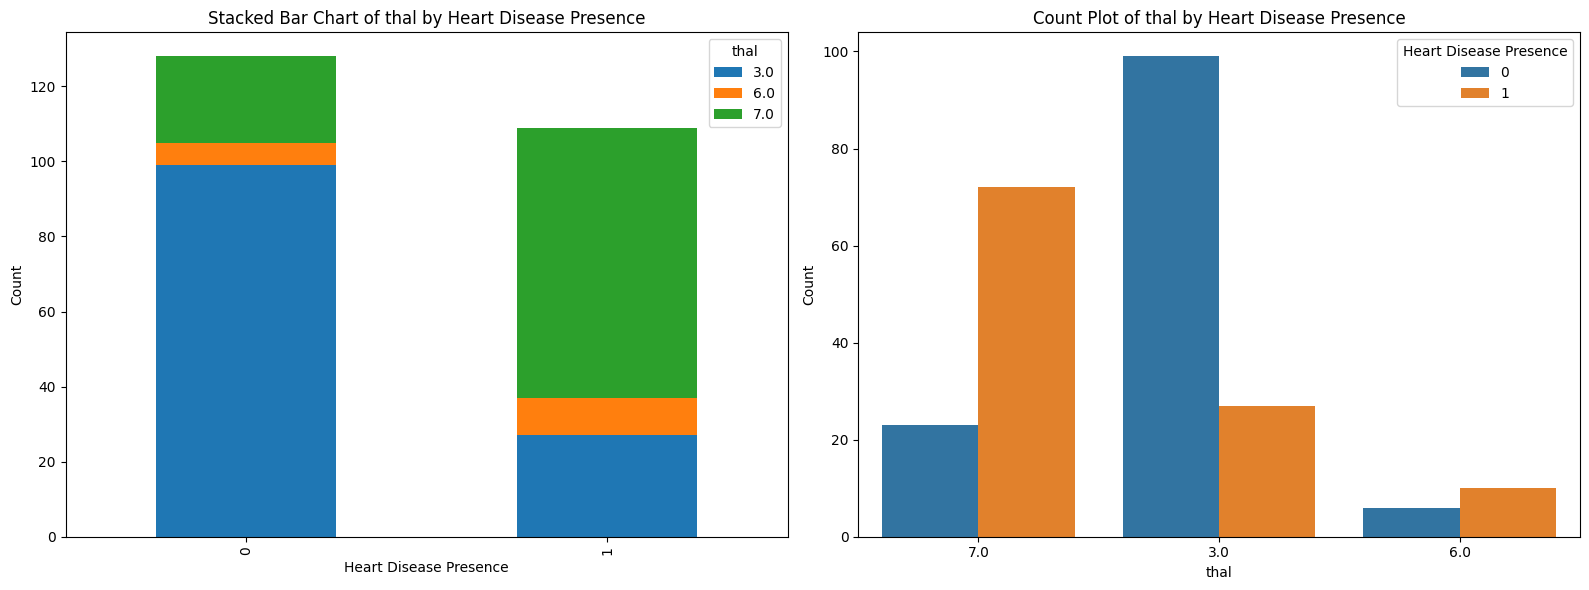

In [ ]:
# Define the columns to analyze
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  # Replace with your actual column names
# Loop through each column to perform chi-square tests and display results
for column in columns:
    # Perform chi-square test
    contingency_table = pd.crosstab(train_data['HeartDiseasePresence'], train_data[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the chi-square test result with scientific notation for p-value
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 Statistic = {chi2:.5f}, p-value = {p:.2e}, Degrees of Freedom = {dof}")
    if p < 0.05:
        print(f"Significant association between {column} and HeartDiseasePresence (p < 0.05).\n")
    else:
        print(f"No significant association between {column} and HeartDiseasePresence (p >= 0.05).\n")


    # Create a figure with side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Left plot: Stacked bar chart
    counts = train_data.groupby(['HeartDiseasePresence', column]).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title(f'Stacked Bar Chart of {column} by Heart Disease Presence')
    axes[0].set_xlabel('Heart Disease Presence')
    axes[0].set_ylabel('Count')
    axes[0].legend(title=column)

    # Right plot: Countplot
    sns.countplot(data=train_data, x=column, hue='HeartDiseasePresence', ax=axes[1])
    axes[1].set_title(f'Count Plot of {column} by Heart Disease Presence')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].legend(title='Heart Disease Presence')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


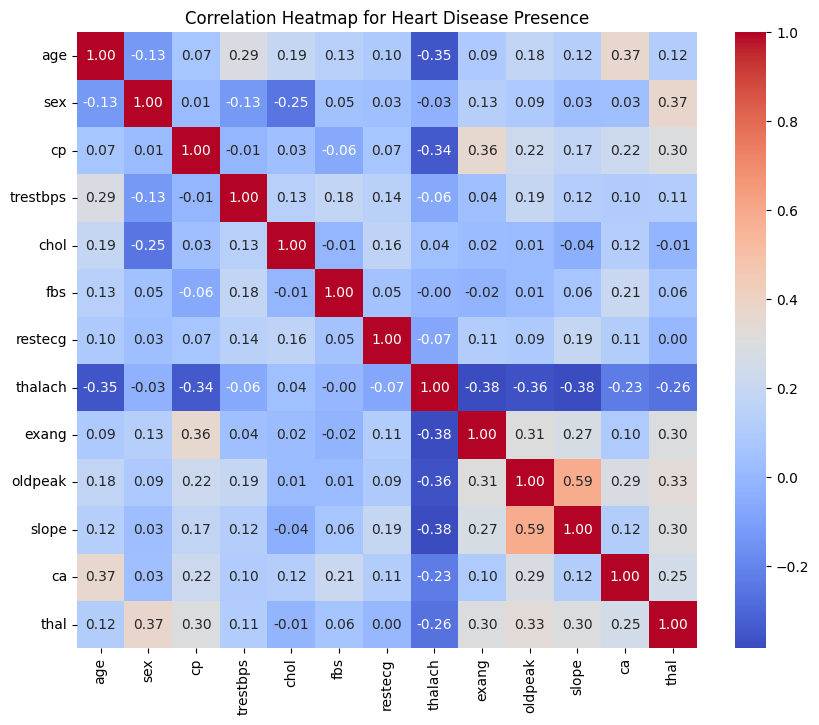

In [ ]:
# Calculate and plot the correlation matrix for severity level 0
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Heart Disease Presence')
plt.show()